In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [2]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns= data.feature_names)
df['target'] = data.target

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(455, 30) (455,) (114, 30) (114,)


In [5]:
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)
y_pred = dtmodel.predict(X_test)
print("accuracy ->", accuracy_score(y_test, y_pred))
print("precision ->", precision_score(y_test, y_pred))
print("recall ->", recall_score(y_test, y_pred))

accuracy -> 0.9298245614035088
precision -> 0.9305555555555556
recall -> 0.9571428571428572


<Axes: >

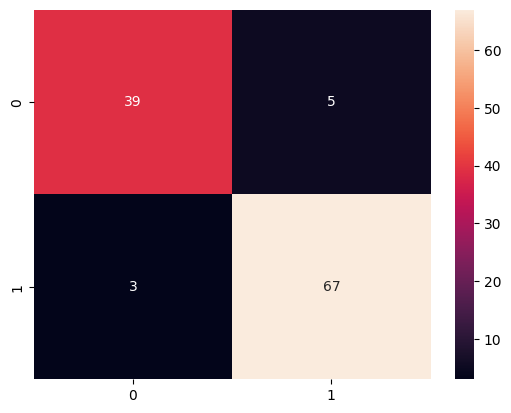

In [8]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [9]:
rfmodel = RandomForestClassifier(n_estimators=20)
rfmodel.fit(X_train, y_train)
y_pred2 = rfmodel.predict(X_test)

print("accuracy ->", accuracy_score(y_test, y_pred2))
print("precision ->", precision_score(y_test, y_pred2))
print("recall ->", recall_score(y_test, y_pred2))

accuracy -> 0.9298245614035088
precision -> 0.9428571428571428
recall -> 0.9428571428571428


<Axes: >

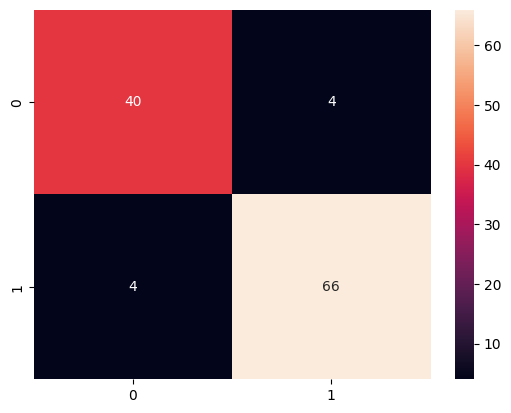

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True)

**HYPERPARAMETER TUNING DECISION TREE**

In [13]:
classifier = DecisionTreeClassifier()

params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter': ['random', 'best'],
    'max_depth' : [x for x in range(1,10)],
    'min_samples_split' : [x for x in range(2,5)]
}

tune = GridSearchCV(estimator=classifier, param_grid= params, cv=3, verbose=True, n_jobs=-1)
tune.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['random', 'best']},
             verbose=True)

In [14]:
tune.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 4,
 'splitter': 'random'}

In [16]:
best_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=4, splitter='best')
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

print("accuracy ->", accuracy_score(y_test, y_pred_best))
print("precision ->", precision_score(y_test, y_pred_best))
print("recall ->", recall_score(y_test, y_pred_best))

accuracy -> 0.9385964912280702
precision -> 0.9315068493150684
recall -> 0.9714285714285714


[Text(0.5677083333333334, 0.9166666666666666, 'worst concave points <= 0.142\ngini = 0.466\nsamples = 455\nvalue = [168, 287]'),
 Text(0.3854166666666667, 0.75, 'worst area <= 957.45\ngini = 0.137\nsamples = 297\nvalue = [22, 275]'),
 Text(0.2708333333333333, 0.5833333333333334, 'area error <= 35.435\ngini = 0.055\nsamples = 281\nvalue = [8, 273]'),
 Text(0.16666666666666666, 0.4166666666666667, 'worst concave points <= 0.138\ngini = 0.015\nsamples = 261\nvalue = [2, 259]'),
 Text(0.08333333333333333, 0.25, 'worst texture <= 33.27\ngini = 0.008\nsamples = 256\nvalue = [1, 255]'),
 Text(0.041666666666666664, 0.08333333333333333, 'gini = 0.0\nsamples = 240\nvalue = [0, 240]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.25, 0.25, 'texture error <= 0.627\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.20833333333333334, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2916666666666667, 0.08333333333333333, 'gini = 

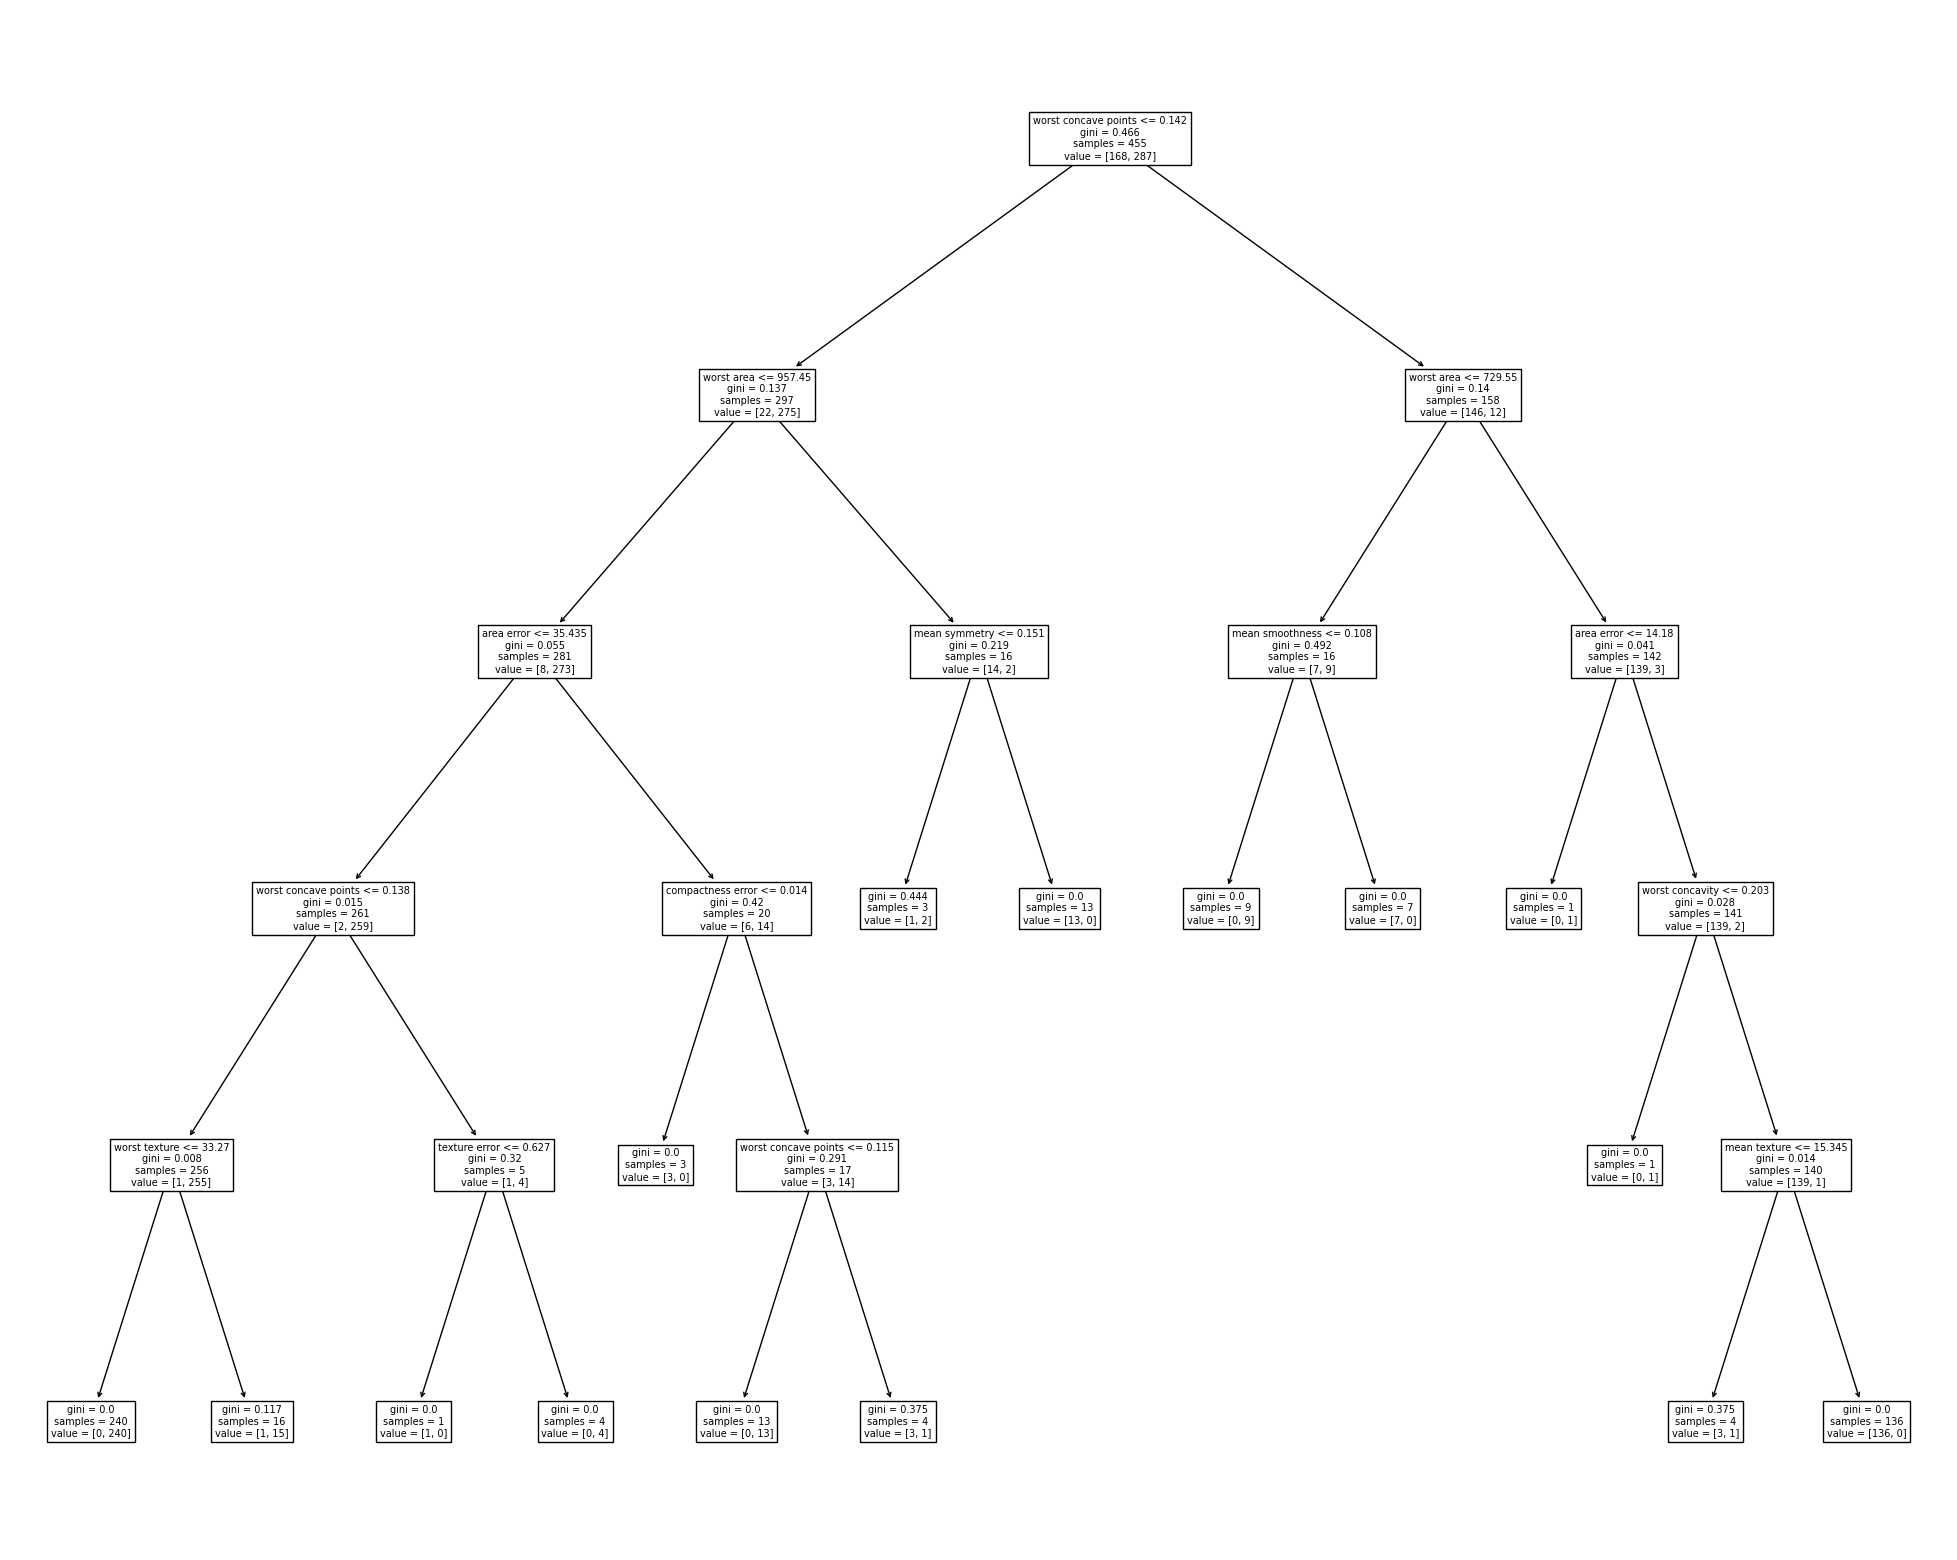

In [18]:
from sklearn import tree 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
tree.plot_tree(best_model, feature_names= data.feature_names)

**HYPERPARAMTER TUNING RANDOM FOREST**

In [19]:
classif = RandomForestClassifier()

params = {
    'criterion' : ['gini', 'entropy','log_loss'],
    'n_estimators': [5,10,20,40,50,75,100],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,4,10,25,35,50],
    'max_depth' : [2,3,4,5,6,7],
}

tuneRF = GridSearchCV(estimator=classif, param_grid=params, cv =3, verbose=True, n_jobs=-1, scoring='accuracy')
tuneRF.fit(X_train,y_train)



Fitting 3 folds for each of 3024 candidates, totalling 9072 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 4, 10, 25, 35, 50],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [5, 10, 20, 40, 50, 75, 100]},
             scoring='accuracy', verbose=True)

In [20]:
tuneRF.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [21]:
best_model_rf = RandomForestClassifier(criterion='gini',max_depth=6, min_samples_leaf=1, min_samples_split=2,n_estimators=75)
best_model_rf.fit(X_train, y_train)
y_pred = best_model_rf.predict(X_test)

print("accuracy ->", accuracy_score(y_test, y_pred))
print("precision ->", precision_score(y_test, y_pred))
print("recall ->", recall_score(y_test, y_pred))

accuracy -> 0.9385964912280702
precision -> 0.9315068493150684
recall -> 0.9714285714285714
